In [12]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import shape

In [4]:
# Set region and quadkey
region = 'India'
quadkey = 123303312 # Replace with quadkey of your choice (this is Bangalore, India)

In [5]:
# Load dataset links from URL
dataset_links = pd.read_csv("https://minedbuildings.blob.core.windows.net/global-buildings/dataset-links.csv")

In [8]:
# Select tile based on region and quadkey
selectedTile = dataset_links[
    (dataset_links.Location == region) & (dataset_links.QuadKey == quadkey)
]

# Download the file from selected tile row.Url
url = selectedTile['Url'].values[0]
!wget -O bangalore.csv.gz $url

--2024-03-07 14:51:36--  https://minedbuildings.blob.core.windows.net/global-buildings/2024-02-27/global-buildings.geojsonl/RegionName%3DIndia/quadkey%3D123303312/part-00014-efab36e1-2ca3-4fce-a407-aab1d1f93da4.c000.csv.gz
Resolving minedbuildings.blob.core.windows.net (minedbuildings.blob.core.windows.net)... 52.239.236.228
Connecting to minedbuildings.blob.core.windows.net (minedbuildings.blob.core.windows.net)|52.239.236.228|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92964854 (89M) [application/octet-stream]
Saving to: ‘file.csv.gz’

file.csv.gz         100%[===================>]  88.66M   750KB/s    in 2m 25s  

2024-03-07 14:54:02 (626 KB/s) - ‘file.csv.gz’ saved [92964854/92964854]



In [9]:

# Load data from URL and convert geometry to Shapely format
df = pd.read_json("bangalore.csv.gz", lines=True)
df["geometry"] = df["geometry"].apply(shape)

# Convert to GeoDataFrame and write to file
gdf = gpd.GeoDataFrame(df, crs=4326)

clipped = gpd.clip(gdf, (77.627591, 12.959483, 77.650422, 12.985317)) # coordinates of Indiranagar, Bangalore

clipped.to_file("indiranagar.geojson", driver="GeoJSON")

<Axes: >

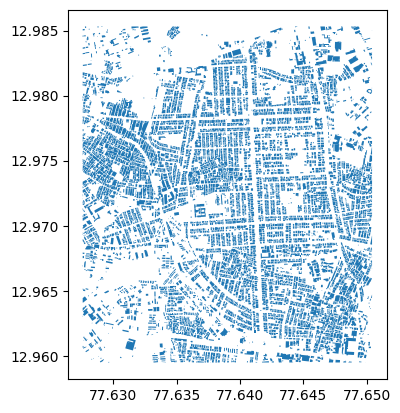

In [13]:
clipped.plot()